# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('country_data.csv')
df.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


In [15]:
life_expectency = df['Life Expectancy']
life_expectancy_quartiles  = np.quantile(life_expectency,[0.25,0.5,0.75])
print(np.mean(life_expectency))
life_expectancy_quartiles

69.24851002109703


array([62.325    , 72.525    , 75.4421875])


 By looking at those three values we can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between 72.5 years and 75.4 years.

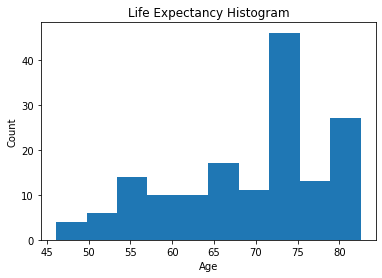

In [13]:
plt.hist(life_expectency)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Life Expectancy Histogram')
plt.show()


Let’s take a moment to think about the meaning of these quartiles. If our country has a life expectancy of 70 years, does that fall in the first, second, third, or final quarter of the data?

70 is between the first and second quartile, so it falls in the second quarter of the data.

# Splitting the Data by GDP


GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          158 non-null    object 
 1   Life Expectancy  158 non-null    float64
 2   GDP              158 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [18]:
gdp = df.GDP
median_gdp = np.median(gdp)
median_gdp

2938.0781152500003

In [31]:
# Let’s now grab all of the rows from our original dataset that have a GDP less than or equal to the median. 
low_gdp = df[df['GDP'] <= median_gdp]
high_gdp = df[df['GDP'] > median_gdp]

low_gdp_quartiles = np.quantile(low_gdp.GDP,[0.25,0.5,0.75])
high_gdp_quartiles = np.quantile(high_gdp.GDP,[0.25,0.5,0.75])
print(low_gdp_quartiles)
print(high_gdp_quartiles)

[ 410.67611404  801.91238317 1955.76724175]
[ 4686.35332822  7902.41078856 20489.79523625]



By looking at the quantiles, we should get a sense of the spread and central tendency of these two datasets.

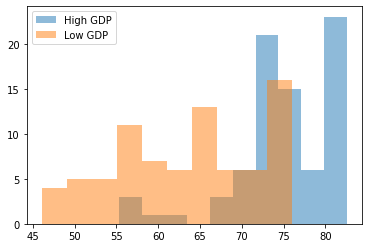

In [32]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

Once again, consider a country that has a life expectancy of 70 years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy?
What if the country is in the bottom half of GDP countries? 

70 is below the first quartile of the high GDP dataset, so it falls in the first quarter of that dataset. 70 is between the second and third quartile of the low GDP dataset, so it falls in the third quarter.